## Decima Primera Clase, Análisis de Regresion. UNAM Acatlan

## Estimación de parámetros, parte III, III

**Gauss-Markov Theorem**

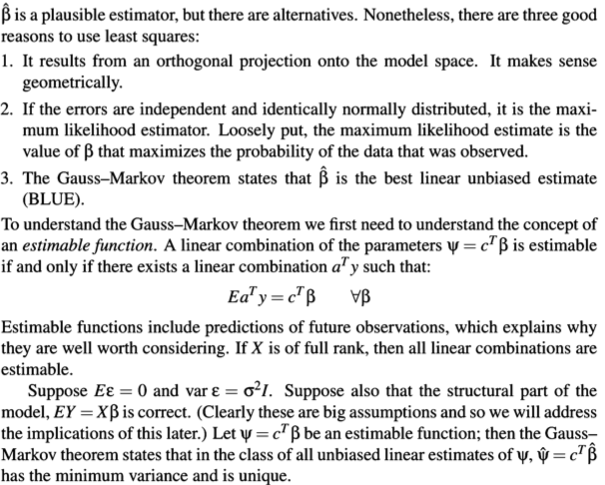

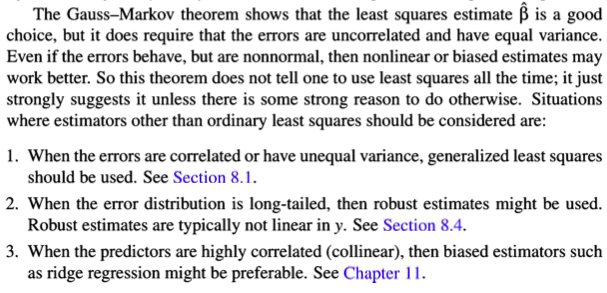

Referencias:
https://people.duke.edu/~rnau/testing.htm


In [ ]:
#### Pregunta de examen                                                      ####
#### Teorema de Gauss Markov nos pide que obtengamos los mejores estimadores ####
#### Qué son los estimadores BLUE?                                           ####

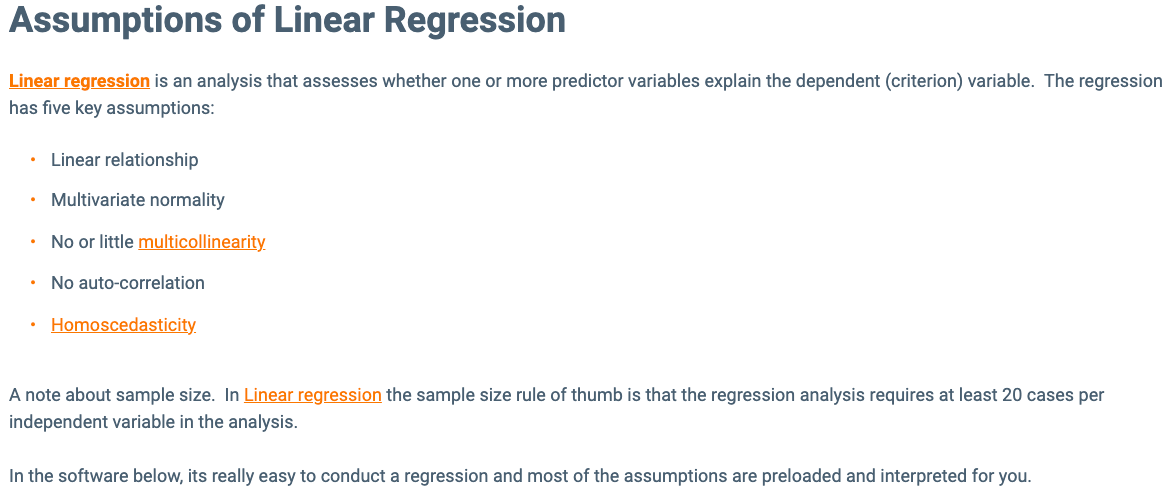

In [1]:
pip install faraway

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 3.3 MB/s eta 0:00:00


In [2]:
###########################################
###Importamos librerias de interes      ###
###########################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import faraway.utils

In [3]:
boston=pd.read_csv('https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv')

In [4]:
boston.head(5)

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [5]:
boston.columns

Index(['506', '13', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [6]:
boston.iloc[0]

506               CRIM
13                  ZN
Unnamed: 2       INDUS
Unnamed: 3        CHAS
Unnamed: 4         NOX
Unnamed: 5          RM
Unnamed: 6         AGE
Unnamed: 7         DIS
Unnamed: 8         RAD
Unnamed: 9         TAX
Unnamed: 10    PTRATIO
Unnamed: 11          B
Unnamed: 12      LSTAT
Unnamed: 13       MEDV
Name: 0, dtype: object

In [7]:
boston.columns=boston.iloc[0]

In [8]:
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [9]:
boston=boston.iloc[1:]

In [10]:
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [11]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  MEDV     506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [12]:
var=boston.columns
print(var)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object', name=0)


In [13]:
for col in var:
  boston[col]=pd.to_numeric(boston[col])

In [14]:
#boston.CRIM=pd.to_numeric(boston.CRIM)

In [15]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [16]:
boston.head(5
          )

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
X=boston.iloc[:,:-1]
print(X.columns)

y=boston.iloc[:,-1]
print(y)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object', name=0)
1      24.0
2      21.6
3      34.7
4      33.4
5      36.2
       ... 
502    22.4
503    20.6
504    23.9
505    22.0
506    11.9
Name: MEDV, Length: 506, dtype: float64


In [19]:
import pandas as pd
#from sklearn.datasets import load_boston

# load data
#boston = load_boston()

#X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.drop('CHAS', axis=1, inplace=True)
#y = pd.Series(boston.target, name='MEDV')

# inspect data
X.head(5)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print("----------------------------------")
print(f'Intercept: {lin_reg.intercept_}')
print("----------------------------------")
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-1.13139078e-01  4.70524578e-02  4.03114536e-02 -1.73669994e+01
  3.85049169e+00  2.78375651e-03 -1.48537390e+00  3.28311011e-01
 -1.37558288e-02 -9.90958031e-01  9.74145094e-03 -5.34157620e-01]
----------------------------------
Intercept: 36.89195979693213
----------------------------------
R^2 score: 0.7355165089722999


In [21]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          7.30e-134
Time:                        02:08:06   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8920      5.147      7.168      0.0

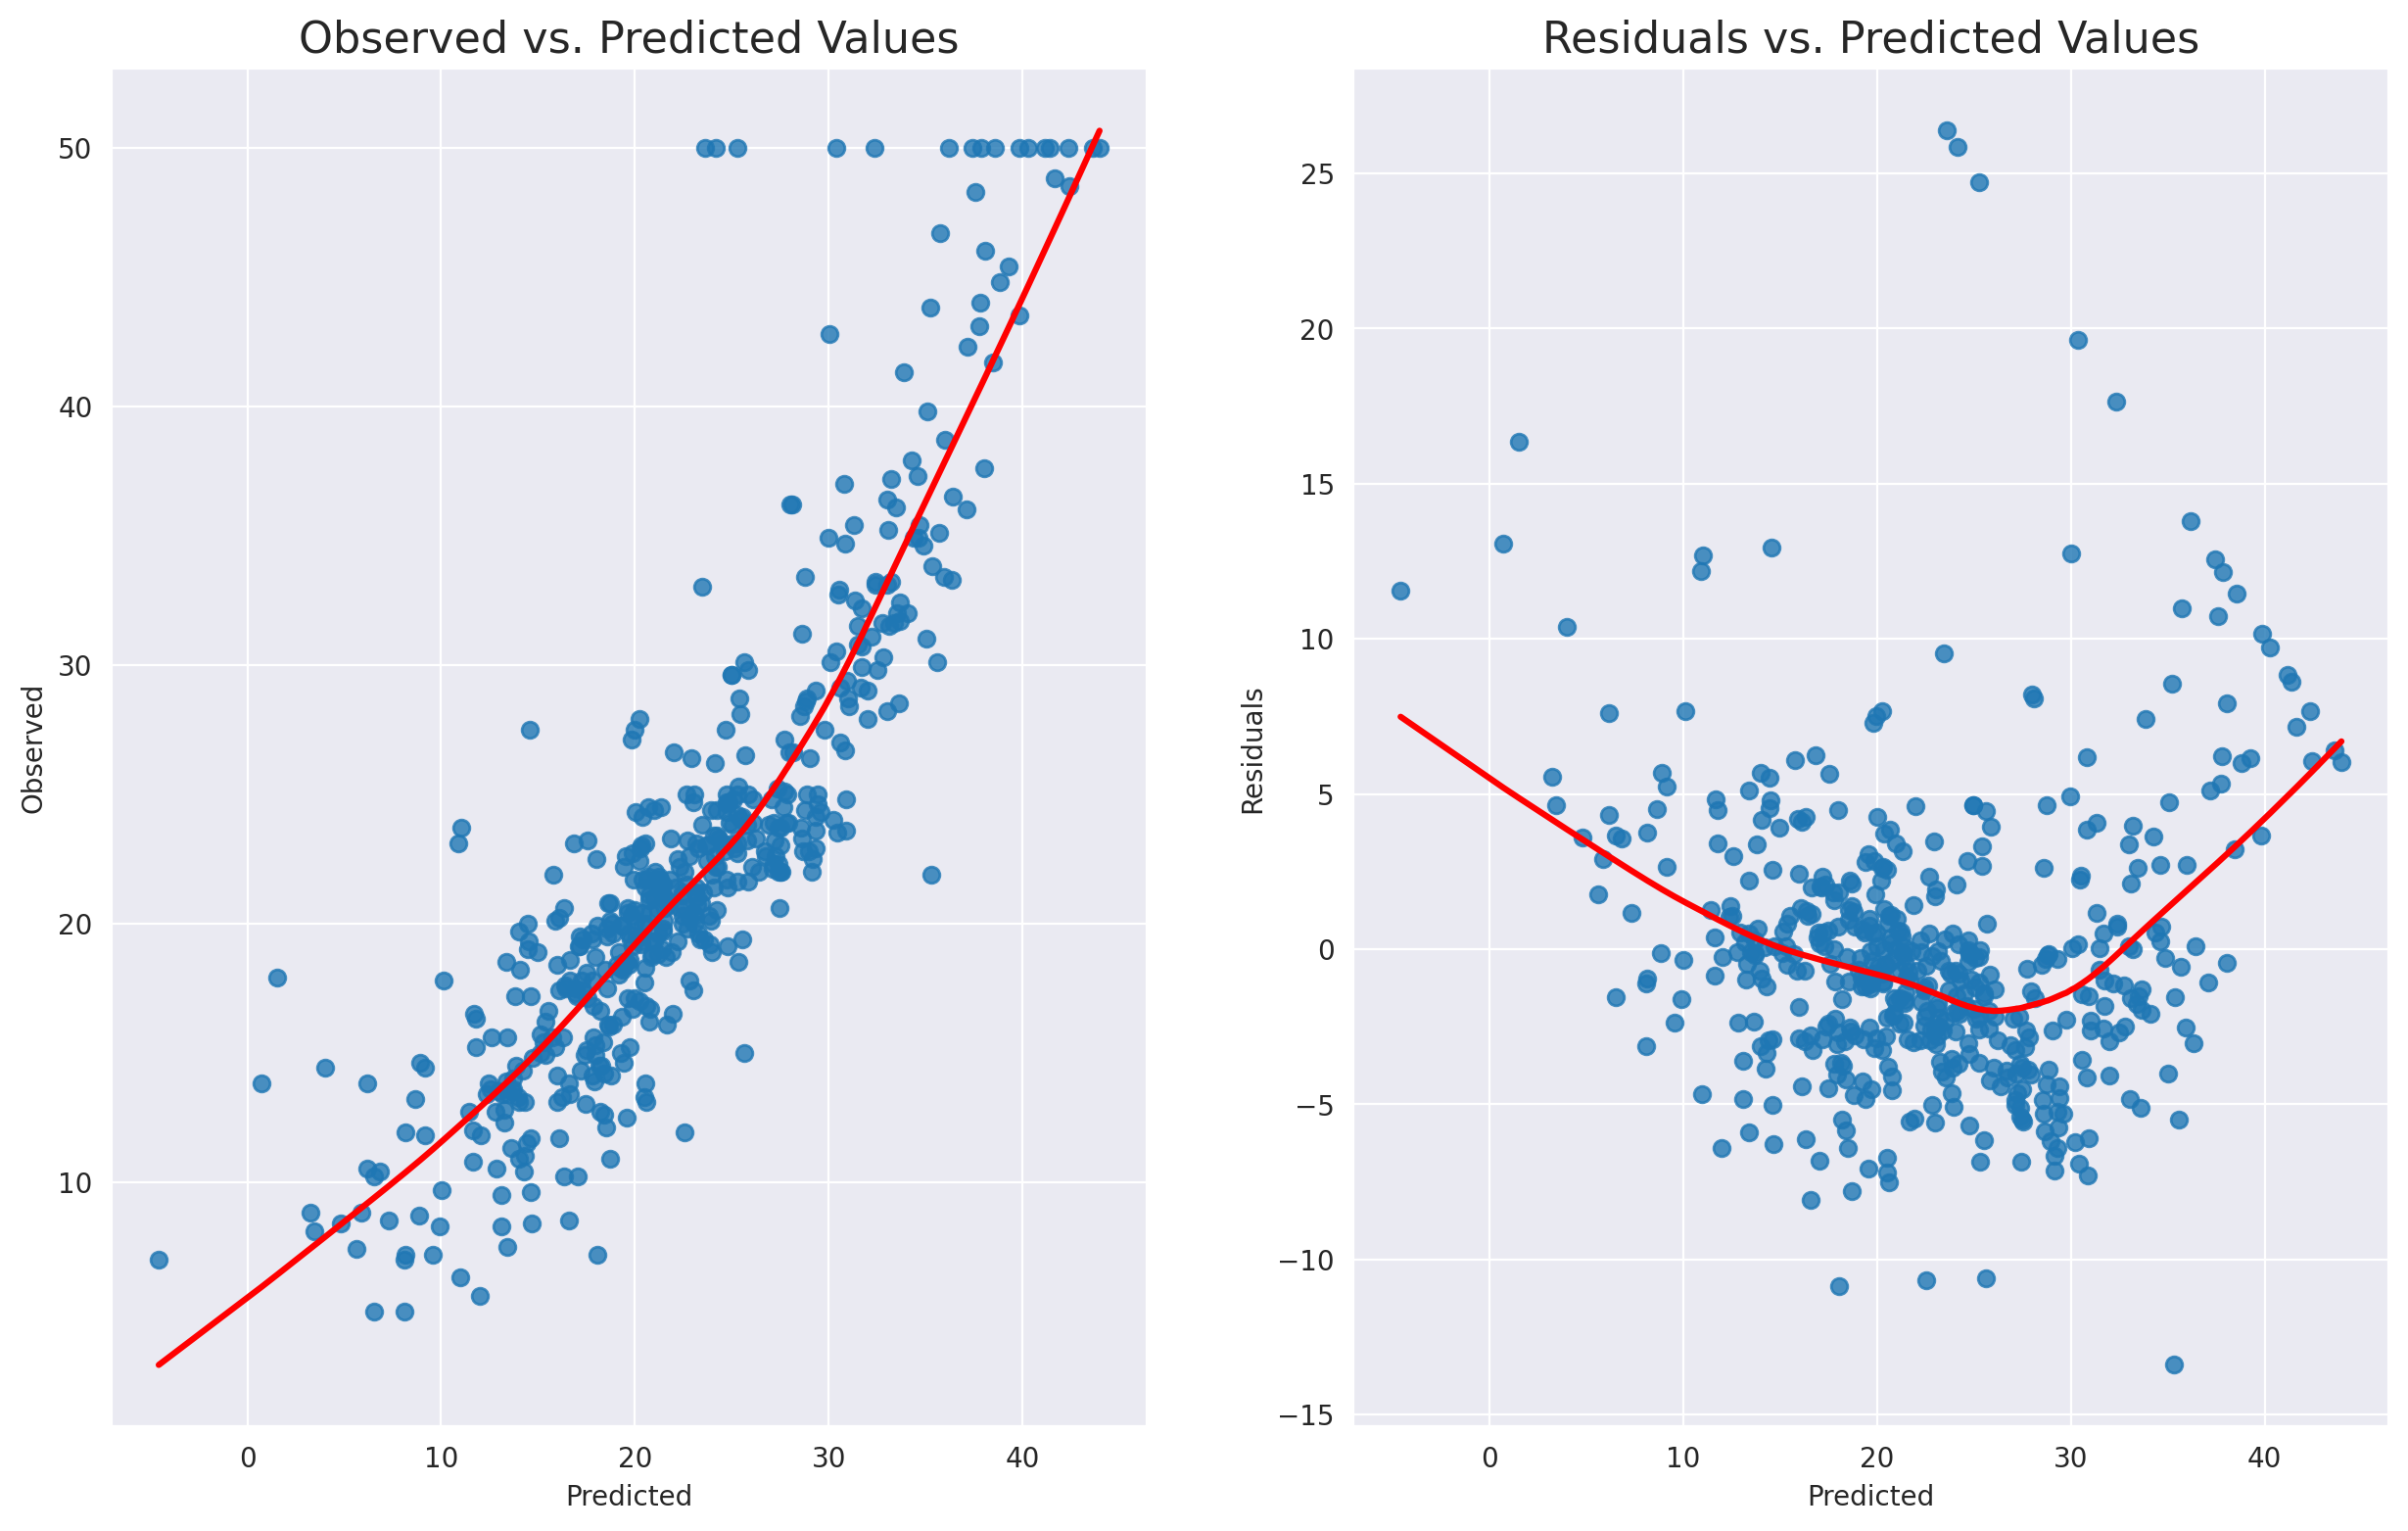

In [22]:
###### Prueba de Linealidad o Multicolinealidad ########
###### Recuerden que esto es sobre el supuesto de matrices full rank
###### o lo que es lo mismo, todas las columnas de la matriz X deben
###### ser independientes unas con otras

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

## Desarrollamos una función que va a tener como salidas dos gráficas
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.

    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

linearity_test(lin_reg, y)

### Observen que no hay linealidad en los errores ni en las predicciones
### Posibles soluciones:
### a. Incluir más variables que si esten relacionadas con el target
### b. buscar transformaciones que no hagan dependiente a las features
### b. añadir otros regresores que no esten en el data set de análisis y que si tengan relación con el target

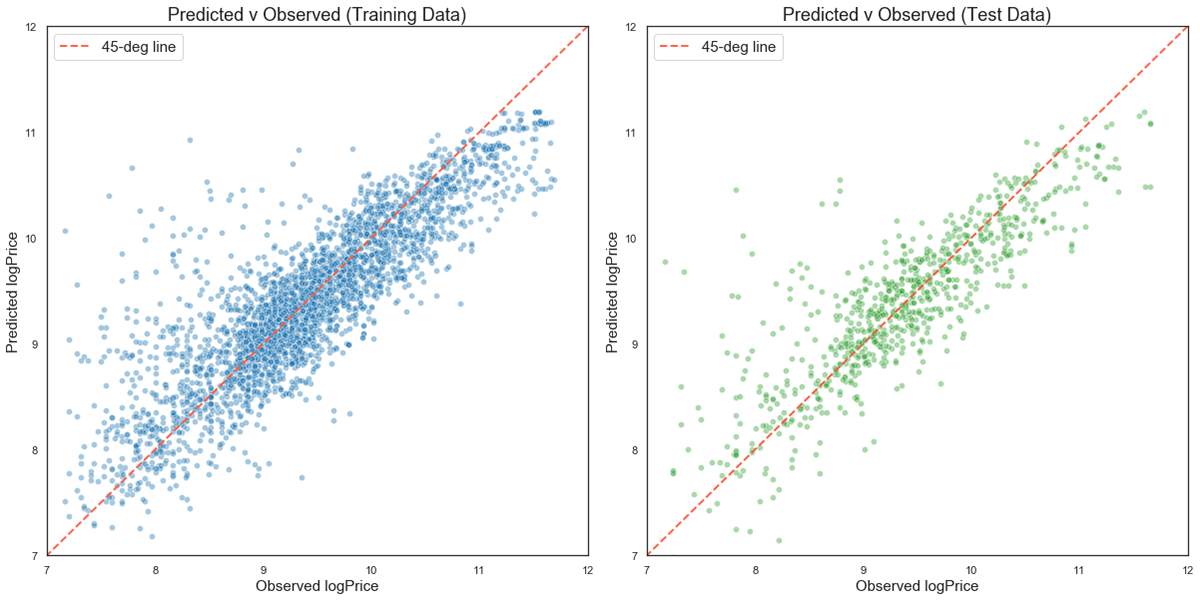

In [23]:
##### Alternativa para encontrar multicolinealidad ####
##### Variance Inflation factor                    ####

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

#### Interpretación y uso:
#### Valores por arriba de 5 indican una correlación mediana
#### Valores por arriba de 10 indican una correlación alta
#### Acción, quitar el feature del dataset de analisis
#### Nota. este indicador solo utiliza la matrix X


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.787705,2.298257,3.949246,4.388775,1.931865,3.092832,3.954961,7.397844,8.876233,1.783302,1.344971,2.931101


In [24]:
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          7.30e-134
Time:                        02:08:12   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8920      5.147      7.168      0.0

In [25]:
vif

[584.8330426836279,
 1.7877050477026801,
 2.2982571208947435,
 3.9492460198316786,
 4.388774665519436,
 1.9318652831904404,
 3.0928316500464437,
 3.954961393087447,
 7.397844228183306,
 8.876232905675,
 1.78330167829317,
 1.3449707668380522,
 2.931101035859631]


 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  6.028613e+01
p-value                        2.001794e-08
f-value                        5.556828e+00
f p-value                      5.935449e-09

 Goldfeld-Quandt test ----
                    value
F statistic  2.620956e+00
p-value      1.251137e-13

 Residuals plots ----


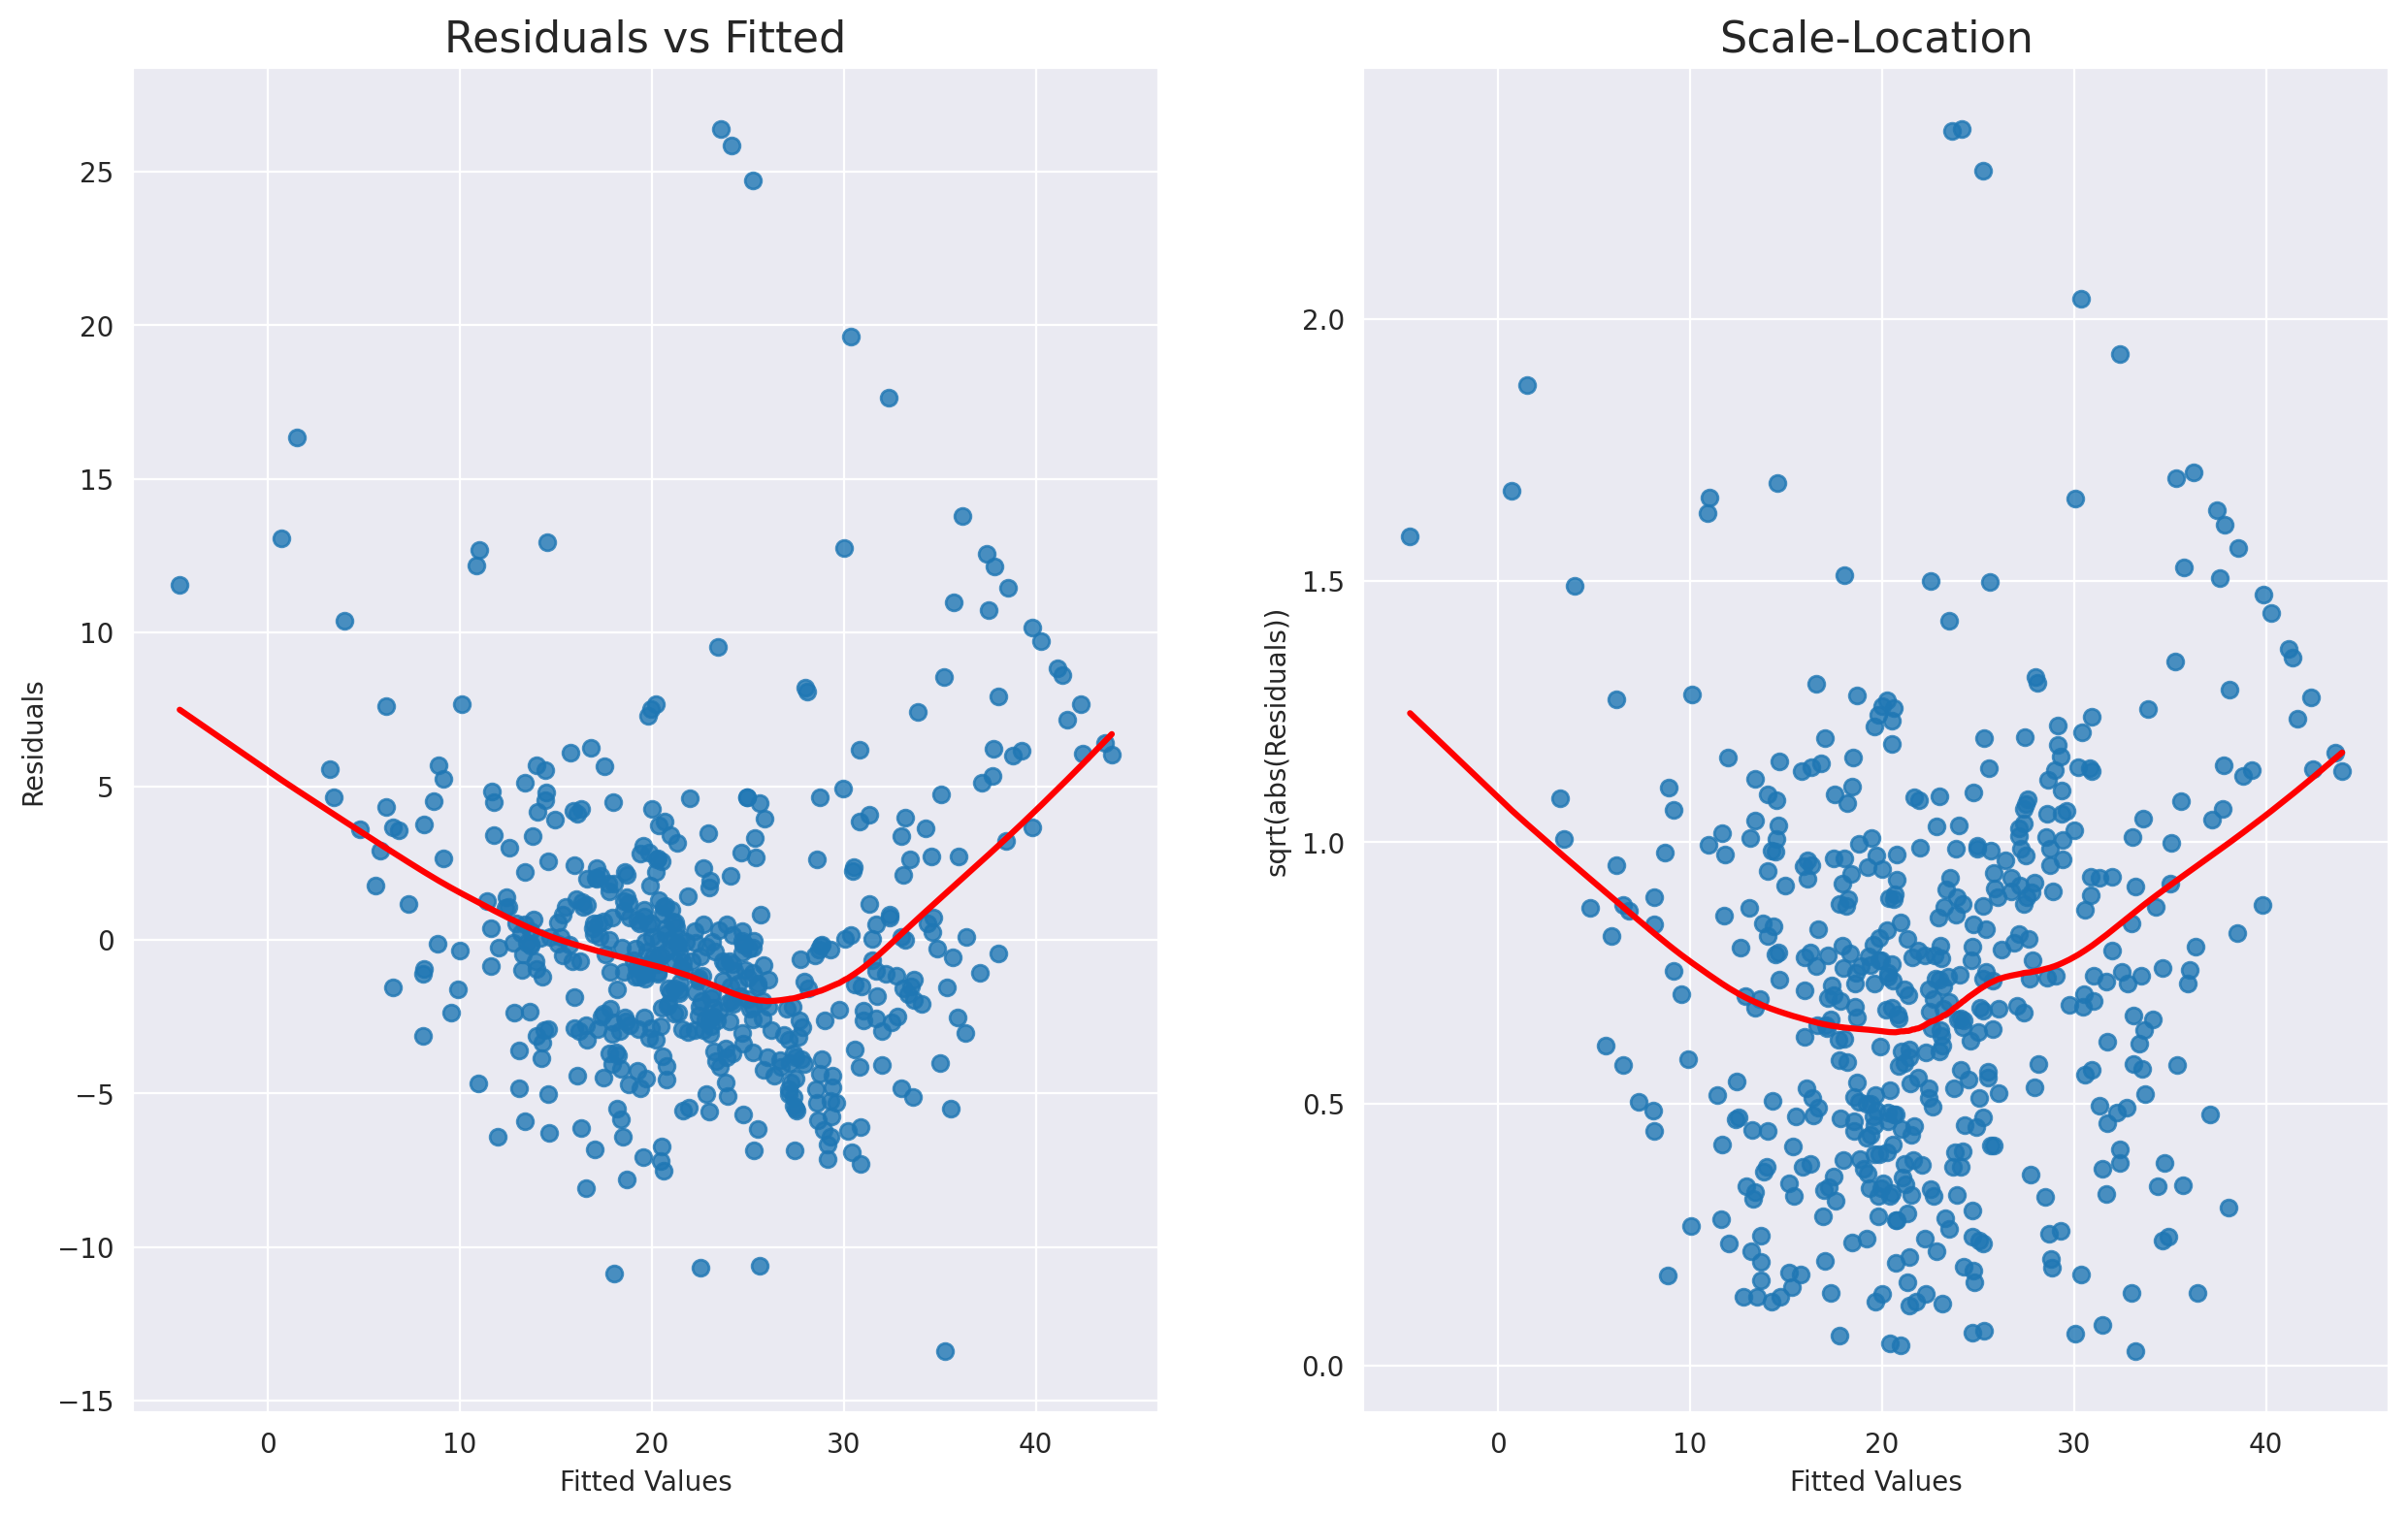

In [27]:
#### Prueba de Homocedasticidad                                      #####
#### Homoscedasticity (equal variance) of residuals                  #####
#### El supuesto que debemos probar es que la varianza sea constante #####

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

### Construimos función para probar la homocedasticidad ###
### ** Pregunta de examen **
### Investigar las siguientes pruebas pruebas (hipótesis probadas y estimador):
### a. Breusch-Pagan
### b. Goldfeld-Quandt

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.

    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog),
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

### Observen que con los P-values no podemo decir que la homocedasticidad en este caso se este cumpliendo
### Inclusive vean como las gráficas no muestran un patrón definido en la varianza, indicio de que la varianza no es constante

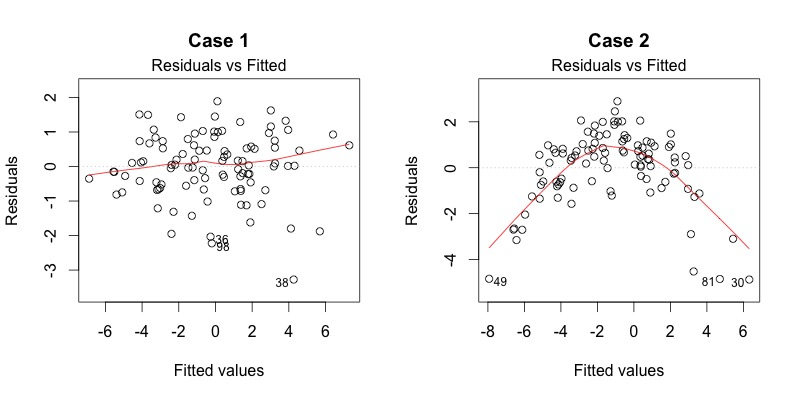

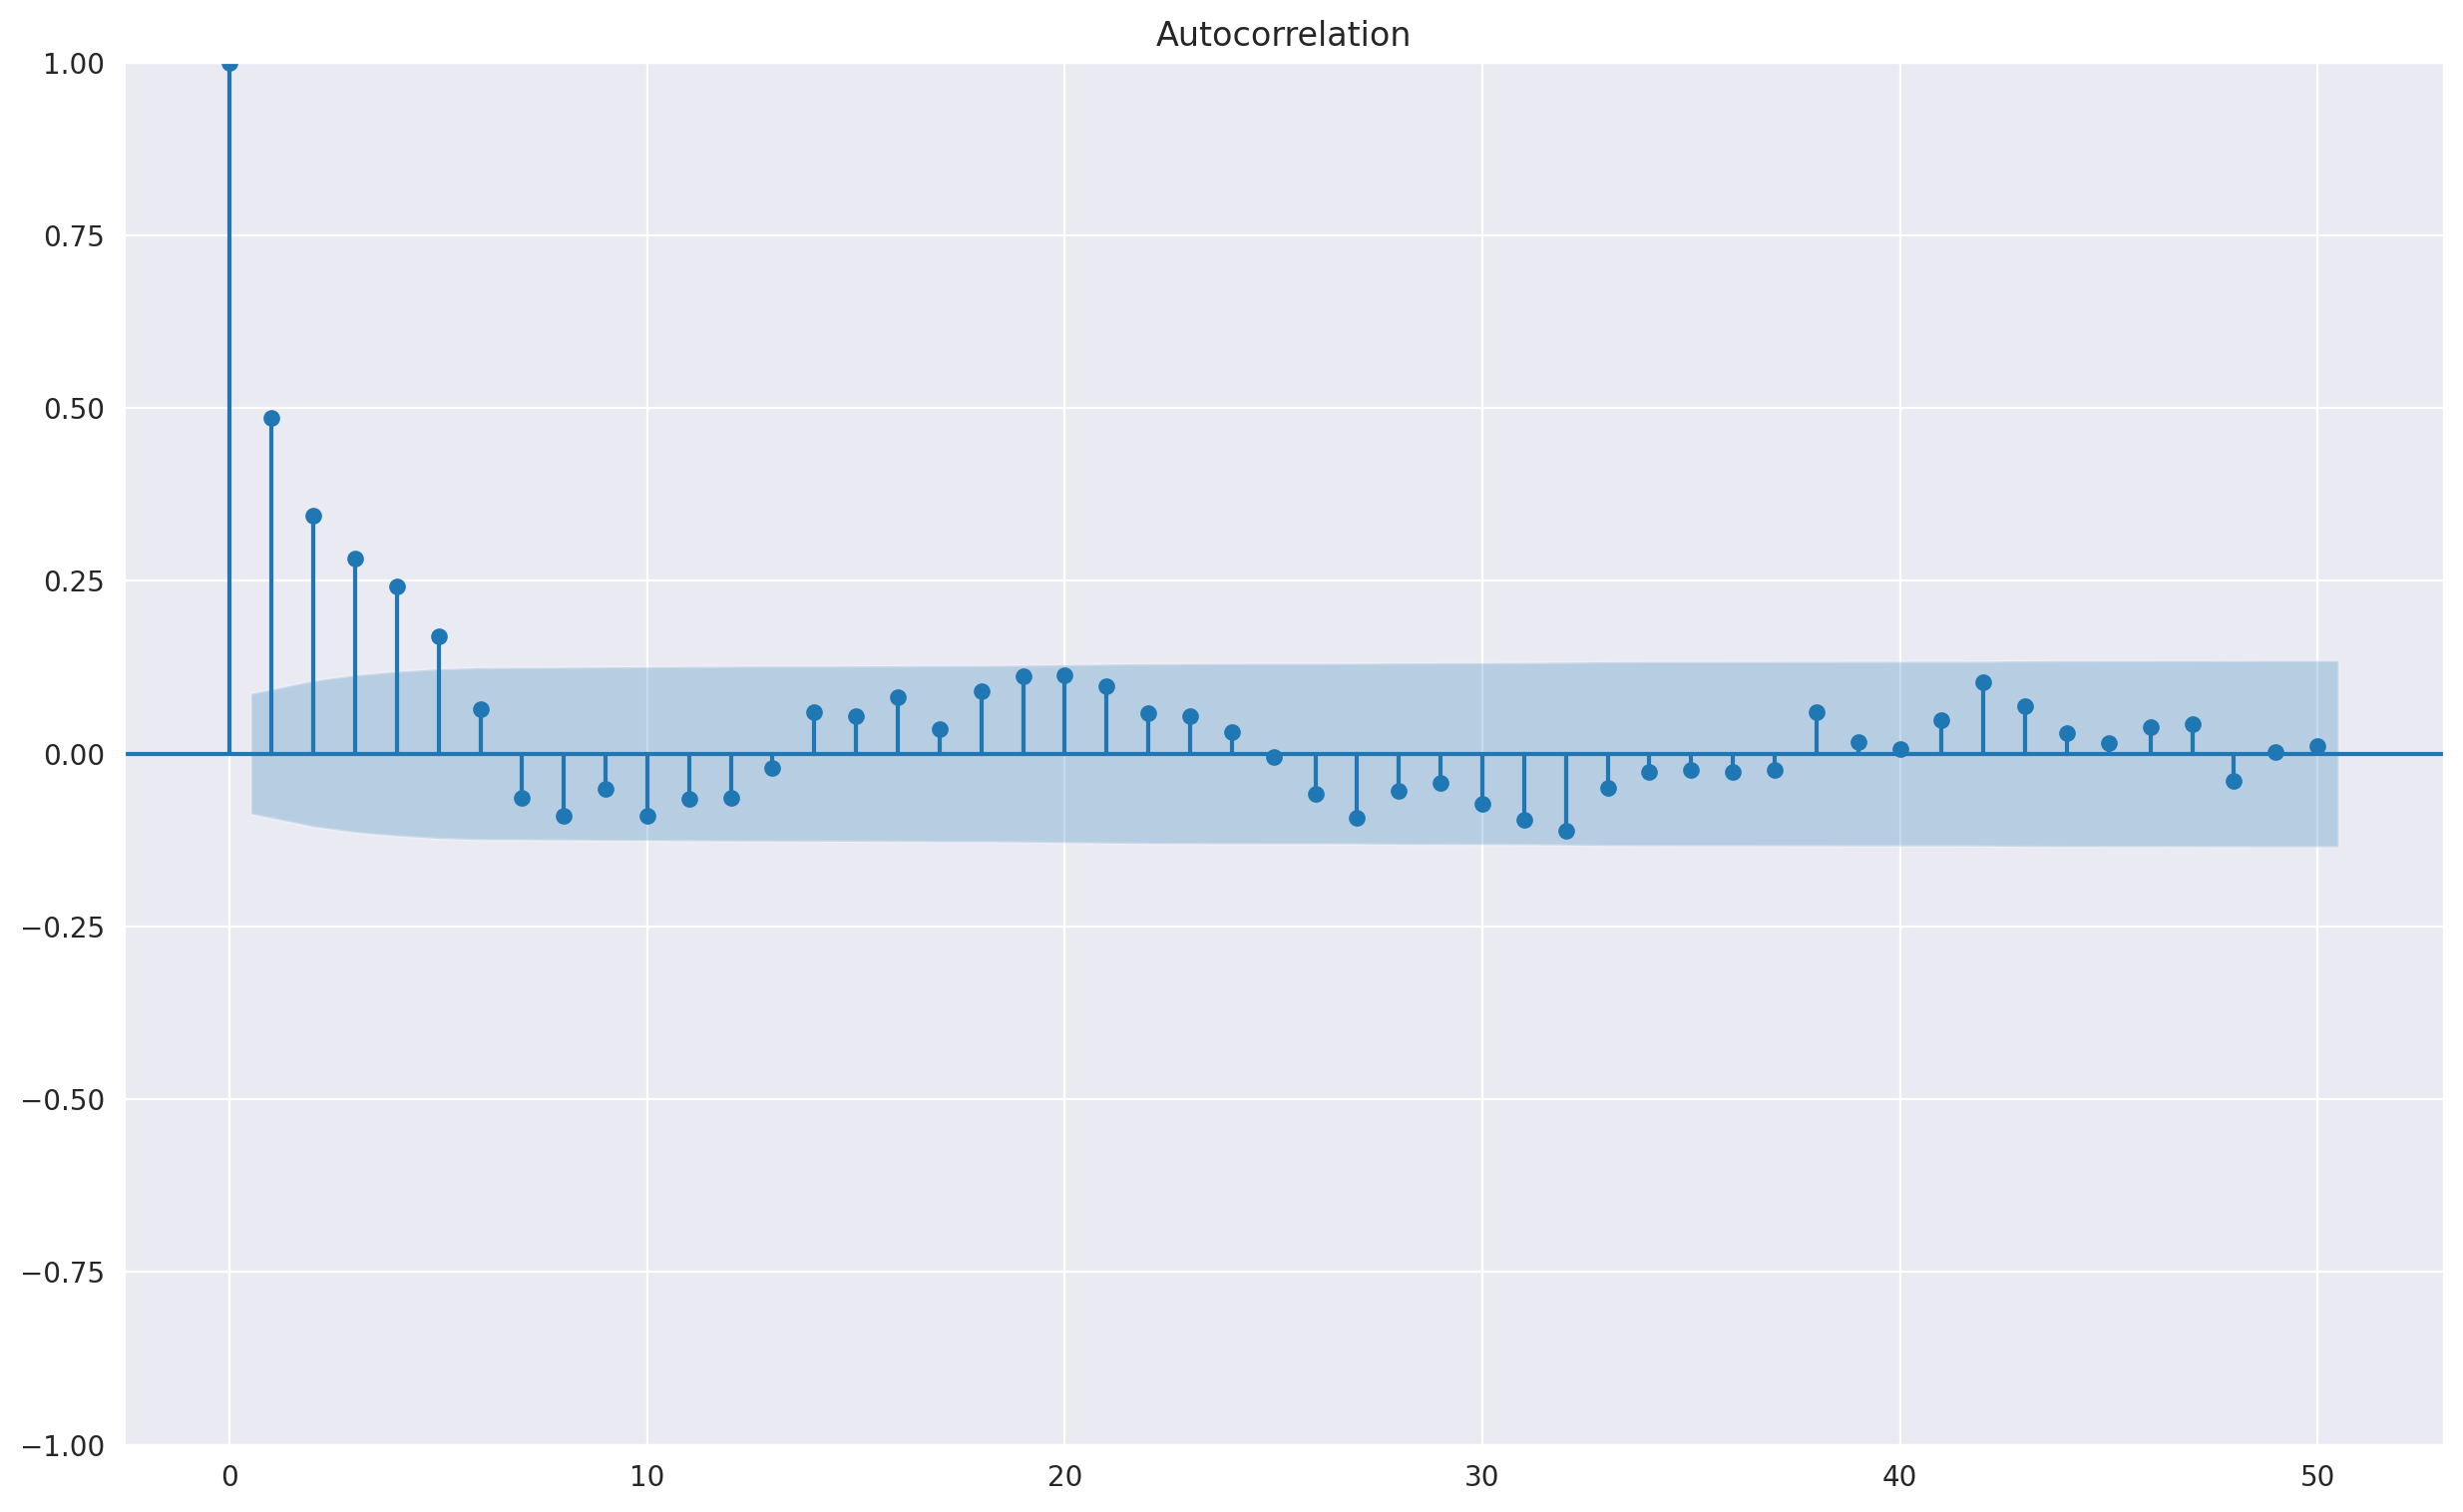

In [28]:
#### Test to find no autocorrelation residuals ####
#### Tenemos que probar que los errores se comporten N(miu,sigma)
#### Pero recuerden; que al ser variables aleatorias IID no debe haber correlación entre los erroes

#### Durbin-Watson test (autocorrelation function):
#### 2(1-a), donde a -> es la correlación del rezago 1

#### Consideraciones sobre el estadístoco DW:
#### a. el estadístico siempre esta entre los valores 0 y 4
#### b. un valor cercano al 2 indica que no hay correlación en los errores
#### c. un valor <2 indica correlación positiva, valor > 2 correlación negativa.

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=50 , alpha=0.05)
acf.show()

#Nota: los residuos los calculamos anteriormente

In [29]:
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          7.30e-134
Time:                        02:38:15   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8920      5.147      7.168      0.0

In [ ]:
X.shape

(506, 12)

In [ ]:
#### Posible causa es que estemos ocupando data estacional, es decir que hayamos ocupado un dataset que dependa del tiempo

In [30]:
##### Another assumption is to look up at the relation between Features and residuals #####
##### Checar la correlación de Pearson para cada una de las features

from scipy.stats.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], lin_reg.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

#### Python realiza una prueba de hipótesis sobre la función de pearson
#### Con los resultados es evidente que tenemos un problema de correlación

Variable: CRIM --- correlation: 0.0000, p-value: 1.0000
Variable: ZN --- correlation: 0.0000, p-value: 1.0000
Variable: INDUS --- correlation: -0.0000, p-value: 1.0000
Variable: NOX --- correlation: -0.0000, p-value: 1.0000
Variable: RM --- correlation: 0.0000, p-value: 1.0000
Variable: AGE --- correlation: -0.0000, p-value: 1.0000
Variable: DIS --- correlation: 0.0000, p-value: 1.0000
Variable: RAD --- correlation: 0.0000, p-value: 1.0000
Variable: TAX --- correlation: 0.0000, p-value: 1.0000
Variable: PTRATIO --- correlation: 0.0000, p-value: 1.0000
Variable: B --- correlation: -0.0000, p-value: 1.0000
Variable: LSTAT --- correlation: -0.0000, p-value: 1.0000


<ipython-input-30-d38ef283267c>:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [31]:
#### checar la varianza de cada feature.                         ####
#### Recuerden; una varianza grande en alguna feauture nos puede
#### alterar el curso de la prueba
#### Nota: sugerencia usar coeficiente de variación
X.apply(np.var, axis=0)

0
CRIM          73.840360
ZN           542.861840
INDUS         46.971430
NOX            0.013401
RM             0.492695
AGE          790.792473
DIS            4.425252
RAD           75.666531
TAX        28348.623600
PTRATIO        4.677726
B           8318.280421
LSTAT         50.893979
dtype: float64

Jarque-Bera test ---- statistic: 898.3521, p-value: 8.420250569538387e-196
Shapiro-Wilk test ---- statistic: 0.8953, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3283, p-value: 0.0000
Anderson-Darling test ---- statistic: 10.9109, 5% critical value: 0.7810
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


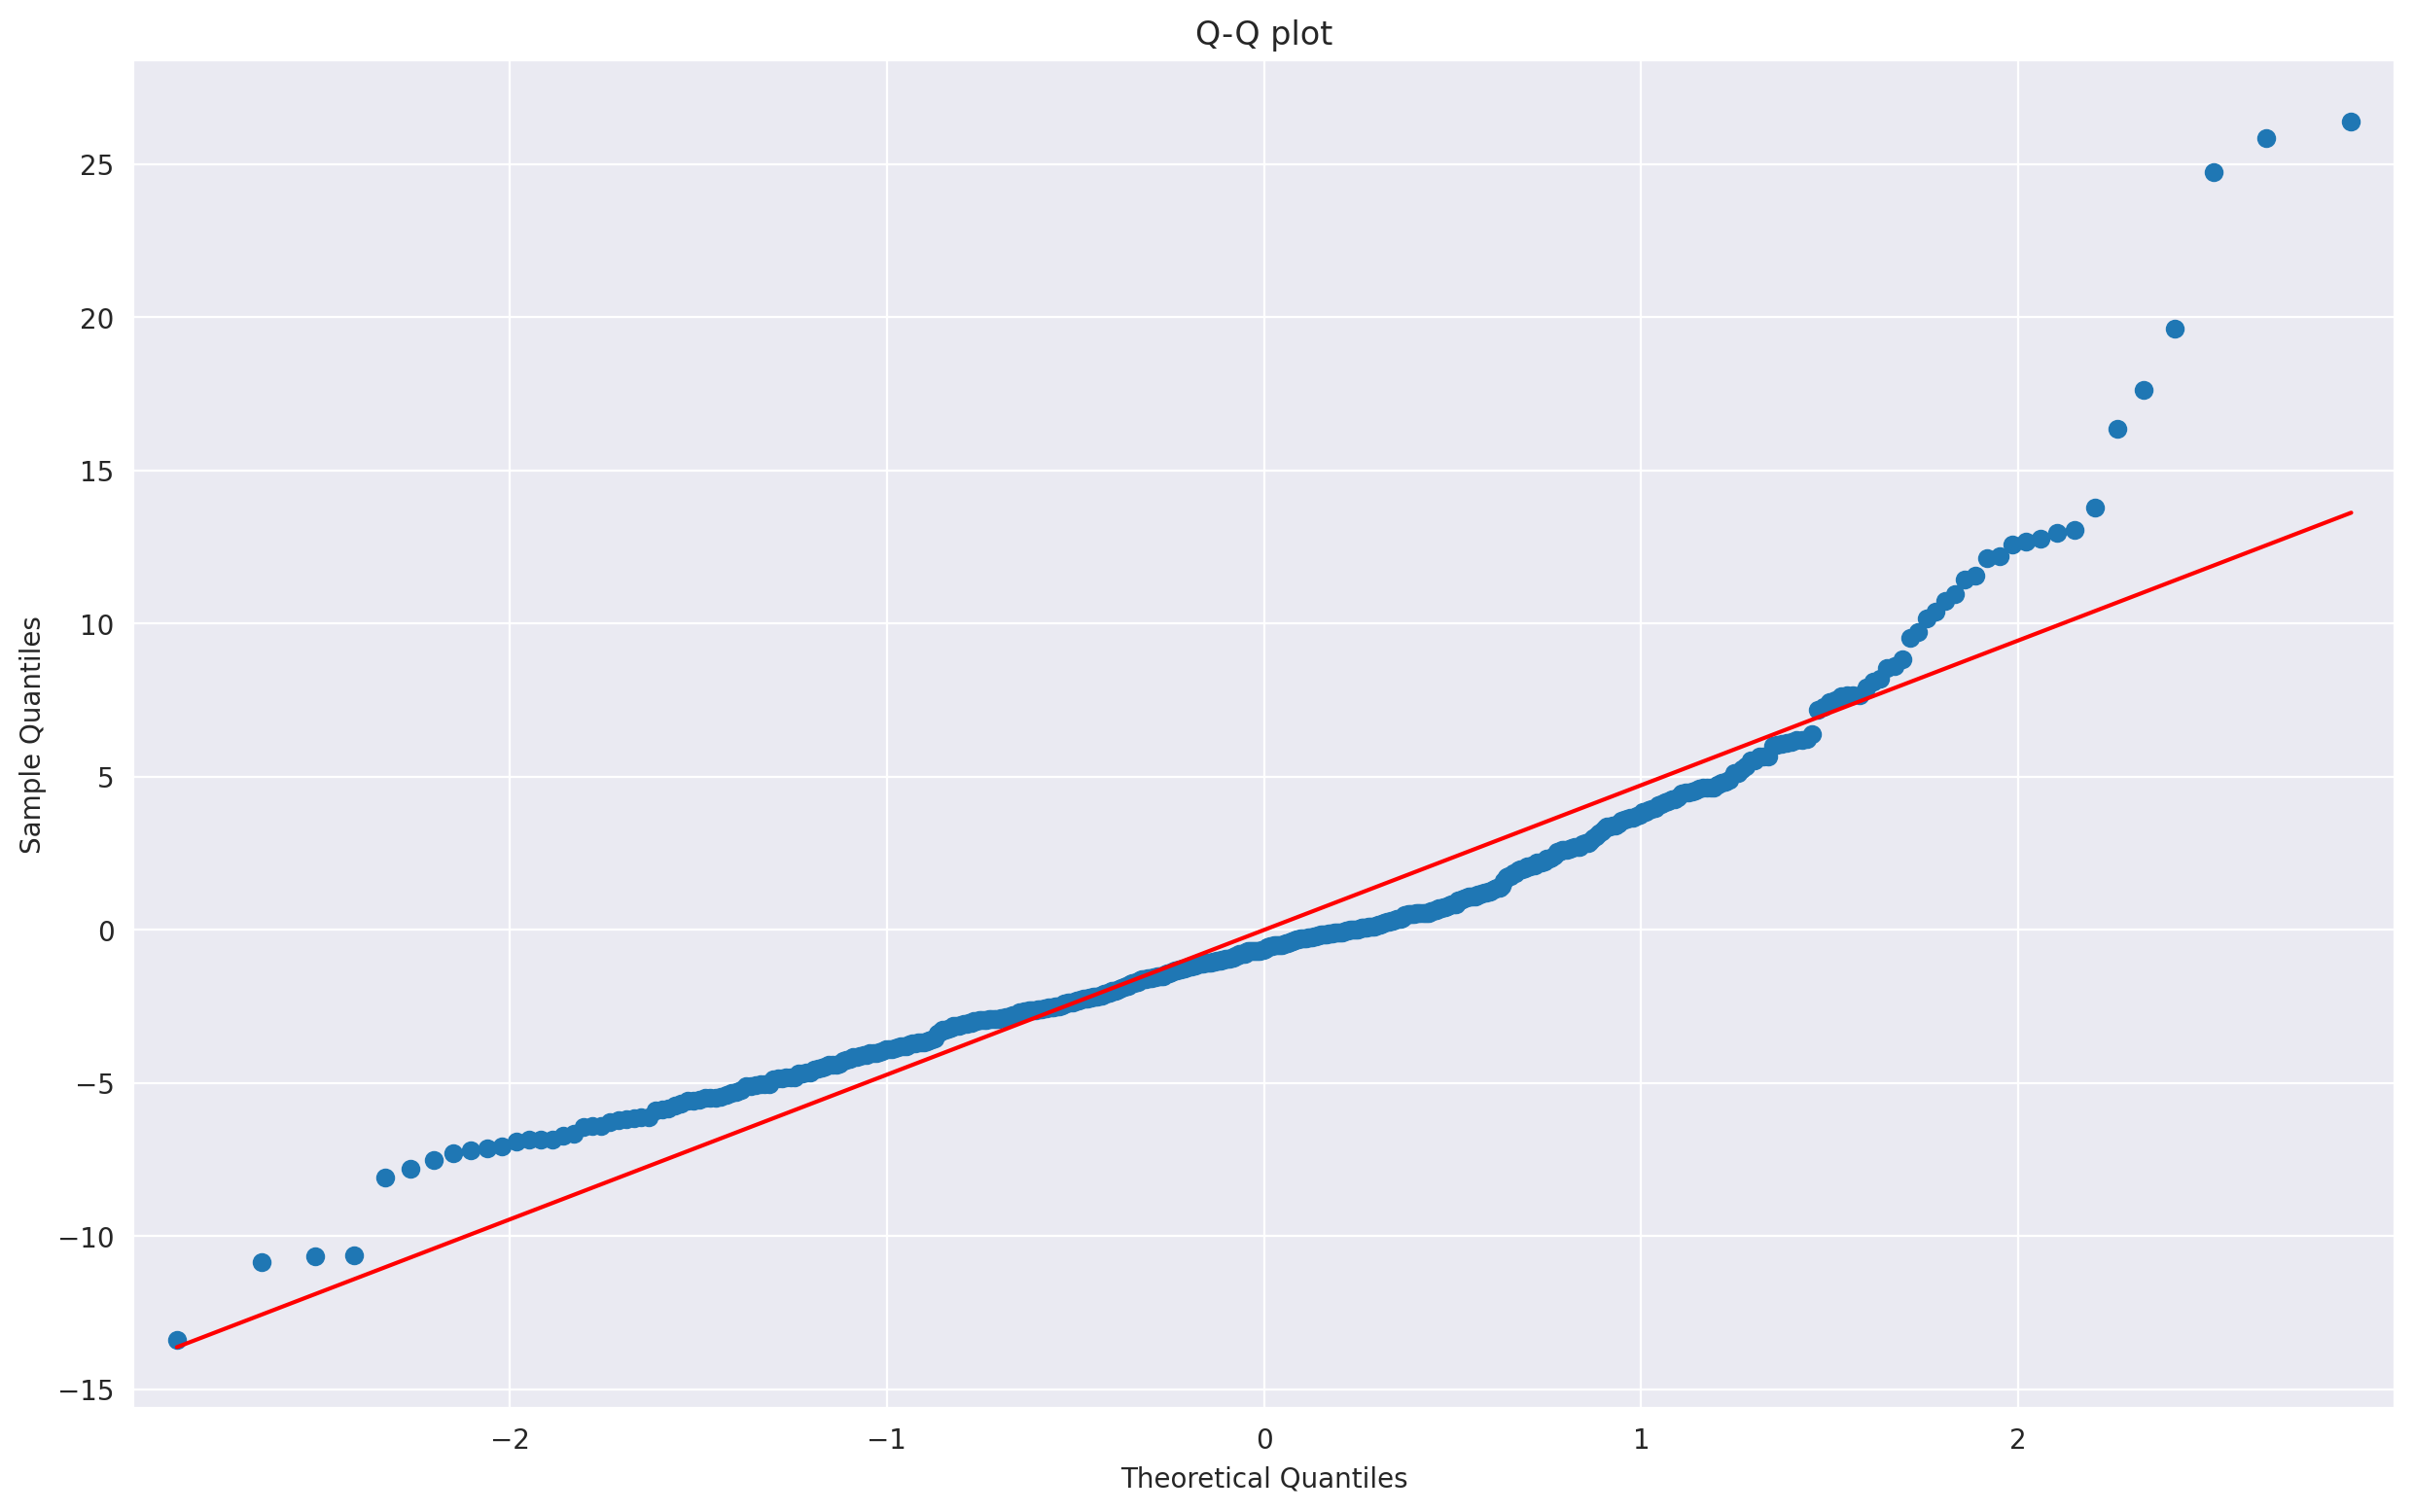

In [32]:
##### Normallity of Residuals                                                           #####
##### No poner a atención a esta situación nos va acarreando problemas en la estimación
##### Problemas que causan que los residuos no se comporten normal:
##### a. presencia de outliers o valores extremos
##### b. alguna violación de los supuestos como los vimos con anterioridad
##### c. no se realiza la lectura correcta de como especificar el modelo (la target no se escogió correctamente)

#### Construimos función para probar la normalidad en los errores

from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to
    investigate the normality of residuals.

    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')

    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')

normality_of_residuals_test(lin_reg)


In [33]:
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          7.30e-134
Time:                        03:05:07   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8920      5.147      7.168      0.0

In [ ]:
#### Se denota que la curva de residuos no sigue la función creciente (prueba QQ; distribución teórica vs observada)
#### A continuación se muestra como se debería ver la gráfica

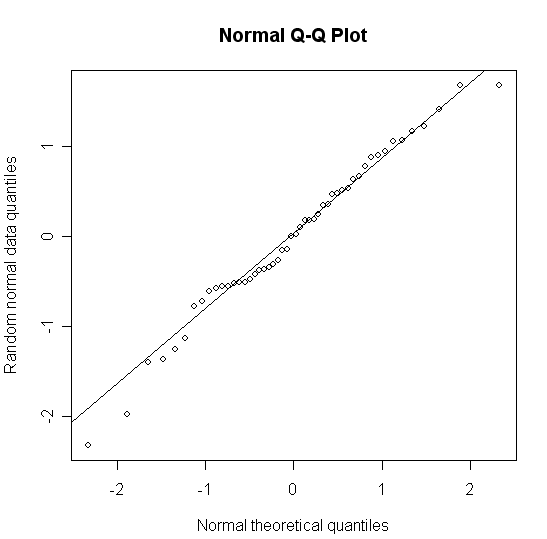

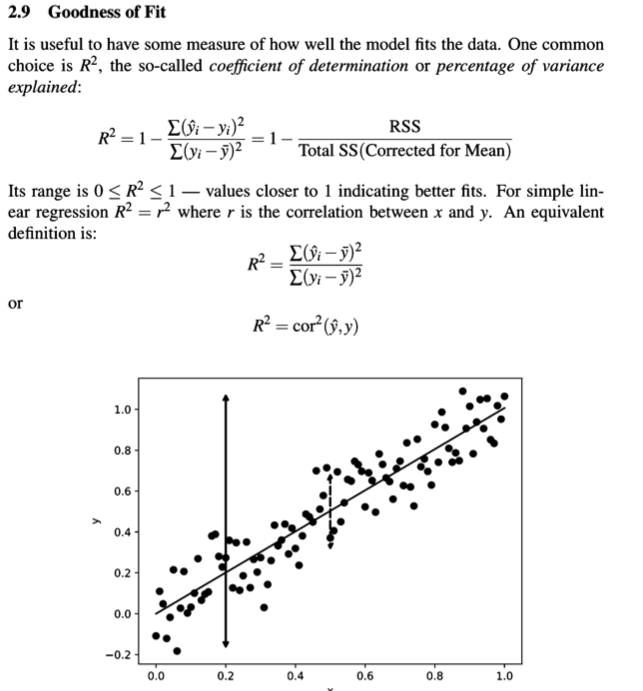

-----------
beta0: 0.00015314269180743007
-----------
beta1: 1.006333243405114
-----------


Text(0.5, 0.7, '')

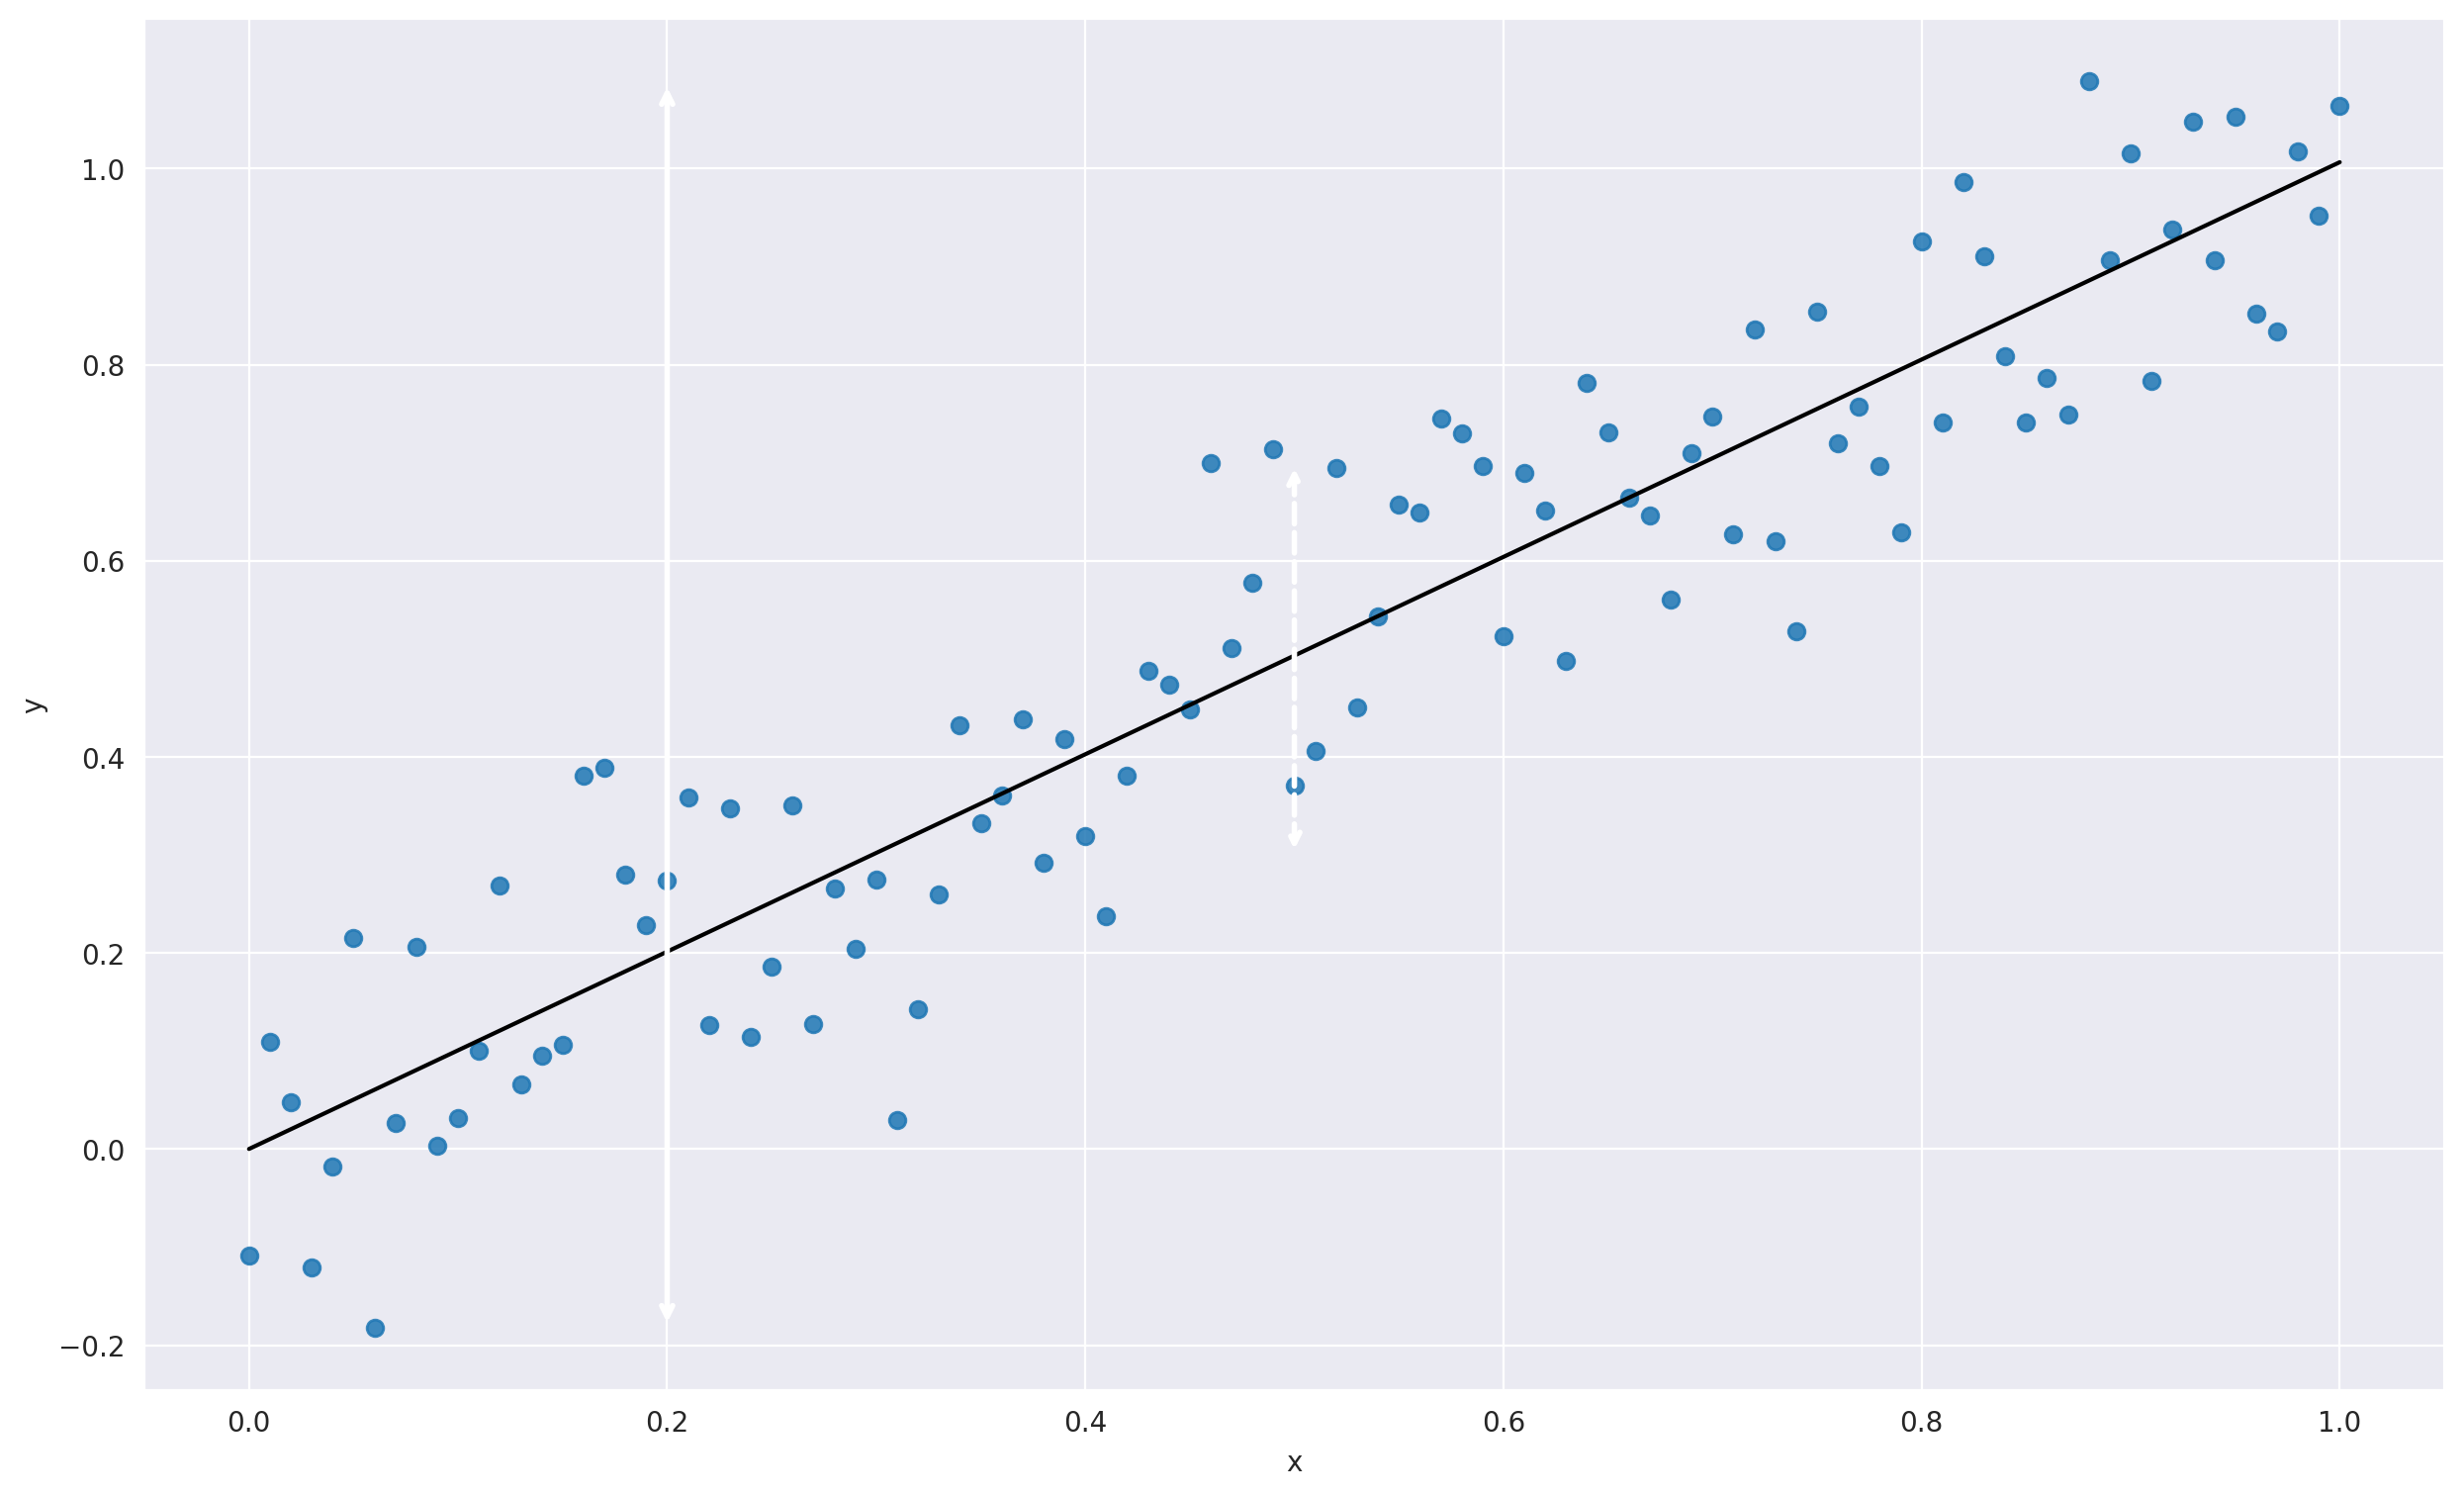

In [34]:
#### Goodness of Fit                                                 #####
#### Probar que una distribución empíria tenga relación una teórica

x= np.linspace(0,1,101)
np.random.seed(123)
y= x + np.random.normal(0,0.1,101)
plt.scatter(x,y, alpha=0.85)
plt.xlabel("x")
plt.ylabel("y")
beta1, beta0 = np.polyfit(x,y,1)

print("-----------")
print(f'beta0: {beta0}')

print("-----------")
print(f'beta1: {beta1}')
print("-----------")

plt.plot([0,1],[beta0, beta0+beta1], "k-")
plt.annotate("", xy=(0.2, min(y)), xytext=(0.2, max(y)), arrowprops=dict(arrowstyle="<->",lw=2))
plt.annotate("", xy=(0.5, 0.3), xytext=(0.5, 0.7), arrowprops=dict(arrowstyle="<->",linestyle="--",lw=2))


In [35]:
df=sns.load_dataset("anscombe")
df.head(10)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


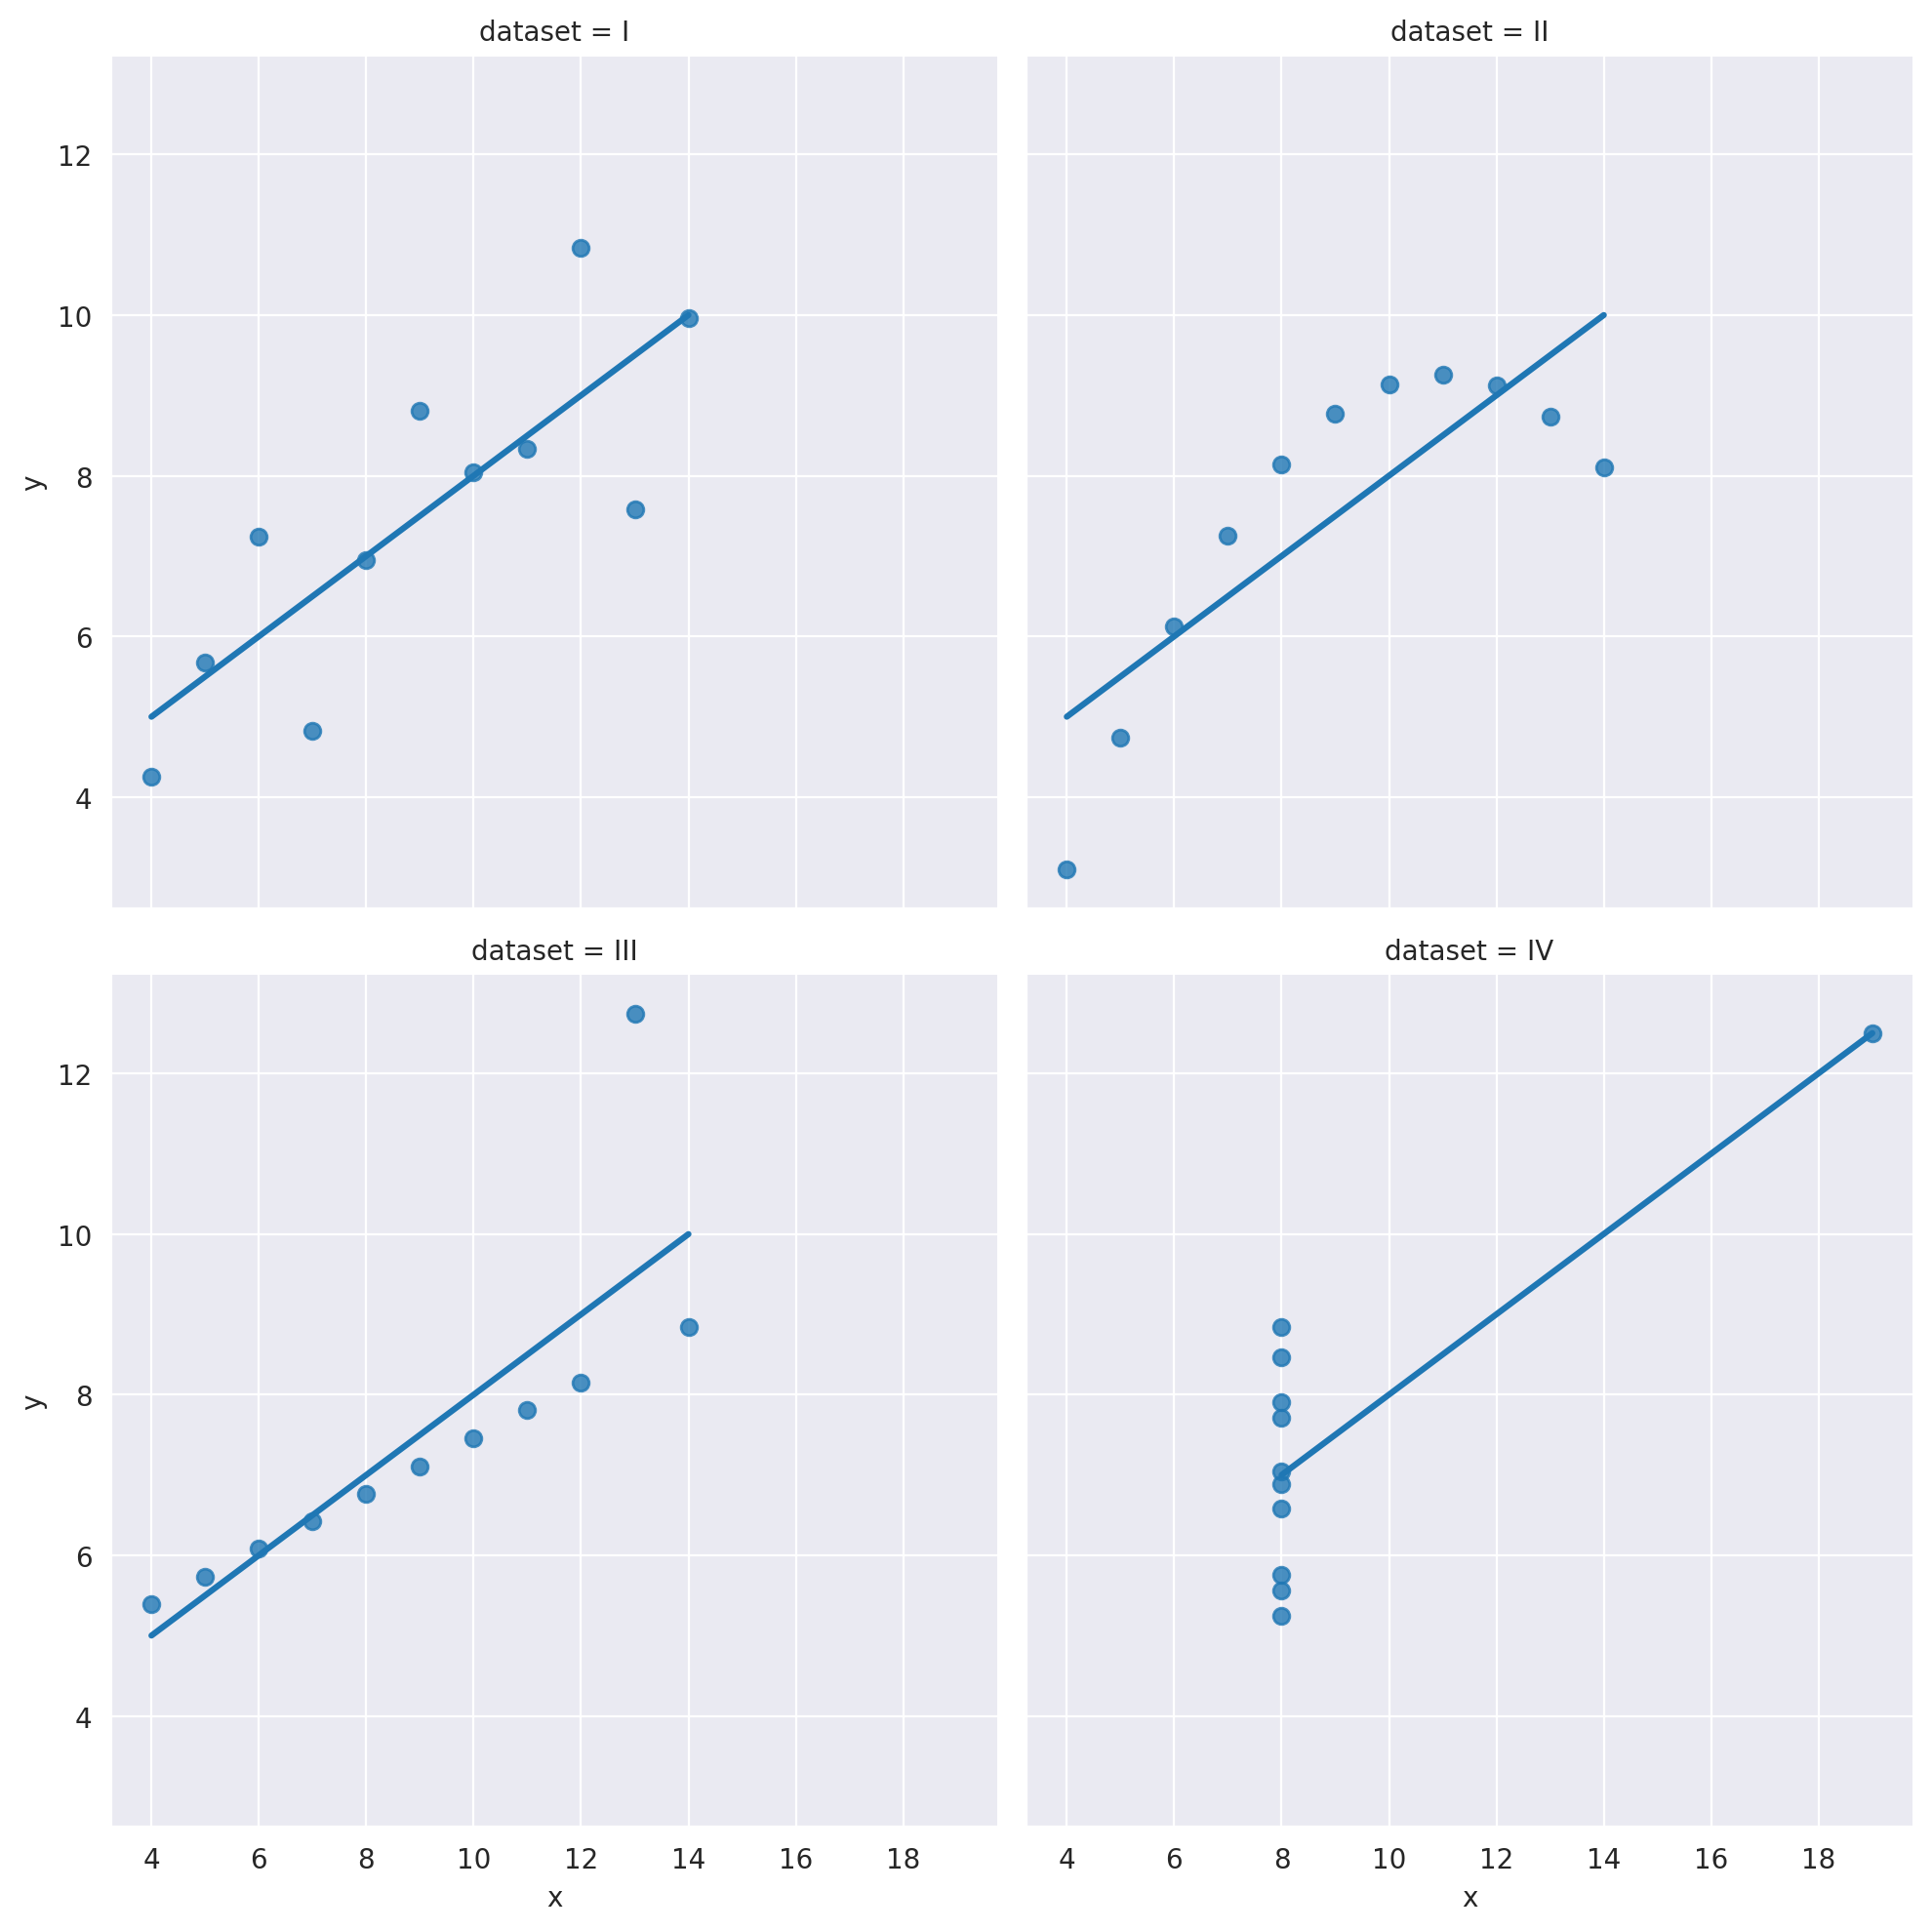

In [36]:
### Probaremos la relación lineal de cada una de las features con la variable objetivo

sns.lmplot(x="x", y="y", col="dataset", data=df, col_wrap=2, ci=None)

In [37]:
#### Dado que la correlación al cuadrado es una buena aproximación
#### del R^2 podemos calcular la correlación con el target

df.groupby("dataset").corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

In [38]:
### Escogemos de dos en dos hasta el final de la tabla

df.groupby("dataset").corr().iloc[0::2,-1]**2

dataset   
I        x    0.666542
II       x    0.666242
III      x    0.666324
IV       x    0.666707
Name: y, dtype: float64

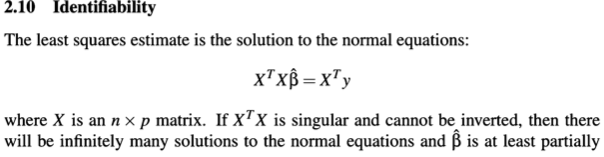

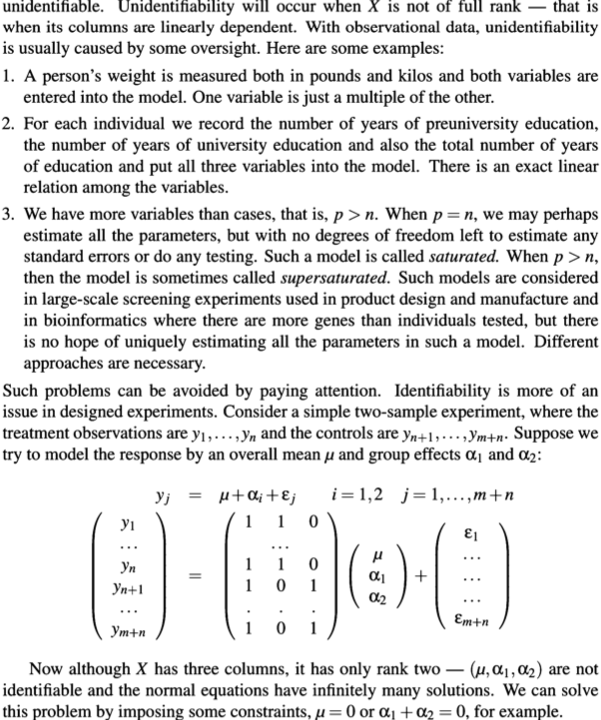

In [39]:
import faraway.datasets.galapagos
galapagos = faraway.datasets.galapagos.load()
galapagos.head(10)


,Species,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,25.09,346,0.6,0.6,1.84
Bartolome,31,1.24,109,0.6,26.3,572.33
Caldwell,3,0.21,114,2.8,58.7,0.78
Champion,25,0.10,46,1.9,47.4,0.18
Coamano,2,0.05,77,1.9,1.9,903.82
Daphne.Major,18,0.34,119,8.0,8.0,1.84
Daphne.Minor,24,0.08,93,6.0,12.0,0.34
Darwin,10,2.33,168,34.1,290.2,2.85
Eden,8,0.03,71,0.4,0.4,17.95
Enderby,2,0.18,112,2.6,50.2,0.10


In [40]:
galapagos['Addif']=galapagos['Area'] - galapagos['Adjacent']

In [41]:
lmodform=smf.ols(
    'Species ~ Area + Elevation + Nearest + Scruz + Adjacent+ Addif', data=galapagos
)

In [42]:
lmod=lmodform.fit()
print(lmod.summary())

                            OLS Regression Results                            
Dep. Variable:                Species   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     15.70
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           6.84e-07
Time:                        03:27:19   Log-Likelihood:                -162.54
No. Observations:                  30   AIC:                             337.1
Df Residuals:                      24   BIC:                             345.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0682     19.154      0.369      0.7

In [43]:
lmod.eigenvals[-1]

1.0700776185597103e-25

In [44]:
lmod.eigenvals

array([5.35096491e+07, 3.64786572e+07, 2.25505543e+06, 1.67991053e+05,
       3.29372985e+03, 1.01337093e+01, 1.07007762e-25])

In [ ]:
### Notemos que el valor el útimo eigen value es muy pequeño lo que indica que la matriz es singular (Nota: recordar propiedades de las matrices singulares)
### Esto fue causado porque estamos violando el supuesto de que la matrix X sea de full-rank al meter una variable linealmente dependiente "Addif"
### Esto también lo podemos revisar en la tabla de resultados con el pvalue de Addif, Qué opinan?

In [45]:
lmod=lmodform.fit(method="qr")

LinAlgError: Singular matrix

In [ ]:
print(lmod.summary())

                            OLS Regression Results                            
Dep. Variable:                Species   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     15.70
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           6.84e-07
Time:                        03:04:30   Log-Likelihood:                -162.54
No. Observations:                  30   AIC:                             337.1
Df Residuals:                      24   BIC:                             345.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0682     19.154      0.369      0.7

In [ ]:
print(lmod.sumary())

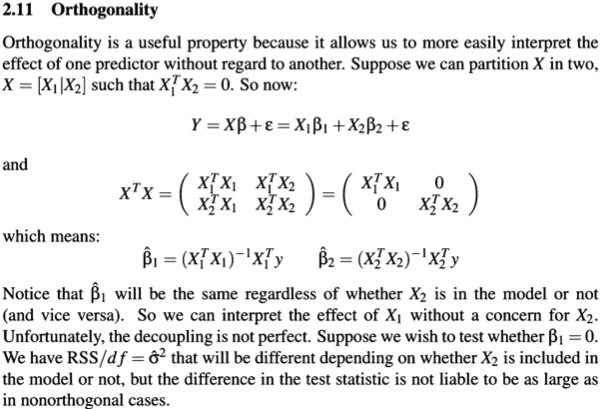

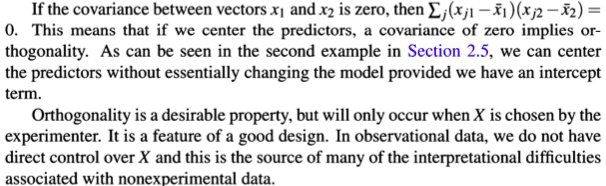

In [46]:
import faraway.datasets.odor
odor = faraway.datasets.odor.load()
odor.head(10)

,odor,temp,gas,pack
0,66,-1,-1,0
1,39,1,-1,0
2,43,-1,1,0
3,49,1,1,0
4,58,-1,0,-1
5,17,1,0,-1
6,-5,-1,0,1
7,-40,1,0,1
8,65,0,-1,-1
9,7,0,1,-1


In [47]:
### Calculamos la covarianza de las variables X
### A pesar de que 'temp' esta en grados F, la matriz es diagonal

odor.iloc[:,1:].cov()

,temp,gas,pack
temp,0.571429,0.000000,0.000000
gas,0.000000,0.571429,0.000000
pack,0.000000,0.000000,0.571429


In [48]:
lmod = smf.ols('odor ~ temp + gas + pack', odor).fit()
lmod.params

Intercept    15.200
temp        -12.125
gas         -17.000
pack        -21.375
dtype: float64

In [49]:
print(lmod.summary())

                            OLS Regression Results                            
Dep. Variable:                   odor   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1.836
Date:                Thu, 21 Mar 2024   Prob (F-statistic):              0.199
Time:                        03:40:52   Log-Likelihood:                -72.716
No. Observations:                  15   AIC:                             153.4
Df Residuals:                      11   BIC:                             156.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2000      9.298      1.635      0.1

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [50]:
lmod.cov_params()

,Intercept,temp,gas,pack
Intercept,8.645545e+01,-3.929531e-15,-4.349313e-15,-1.499763e-16
temp,-3.929531e-15,1.621040e+02,8.066745e-15,9.473158e-31
gas,-4.349313e-15,8.066745e-15,1.621040e+02,-9.990429e-31
pack,-1.499763e-16,9.473158e-31,-9.990429e-31,1.621040e+02


In [ ]:
lmod = smf.ols('odor ~ gas + pack', odor).fit()
lmod.params

Intercept    15.200
gas         -17.000
pack        -21.375
dtype: float64

In [ ]:
print(lmod.summary())

                            OLS Regression Results                            
Dep. Variable:                   odor   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     2.319
Date:                Thu, 13 Apr 2023   Prob (F-statistic):              0.141
Time:                        03:08:59   Log-Likelihood:                -73.310
No. Observations:                  15   AIC:                             152.6
Df Residuals:                      12   BIC:                             154.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2000      9.262      1.641      0.1

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
lmod.cov_params()

,Intercept,gas,pack
Intercept,8.578486e+01,-2.596568e-14,-1.488130e-16
gas,-2.596568e-14,1.608466e+02,9.912938e-31
pack,-1.488130e-16,9.912938e-31,1.608466e+02
